# Examining Seattle Das-train_noise

In [2]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
import datetime
import pandas as pd
from dasquakes import *
import obspy
import os
#from obspy import UTCDateTime
#from obspy.clients.fdsn import Client
#from libcomcat.search import search
#from libcomcat.dataframes import get_summary_data_frame
#import matplotlib.dates as mdates

### Load the DAS Data

In [3]:
!ls /data/data3/seadasn

copyErrors.txt
decimator_2022-11-02_16.51.33_GMT_000700.raw
decimator_2022-11-17_00-00-00_GMT.h5
decimator_2022-11-17_18.57.00_GMT.h5
decimator_2022-11-17_18.58.00_GMT.h5
decimator_2022-11-17_19.00.00_GMT.h5
decimator_2022-11-17_19.01.00_GMT.h5
decimator_2022-11-17_19.02.00_GMT.h5
decimator_2022-11-17_19.03.00_GMT.h5
decimator_2022-11-17_19-04-00_GMT.h5
decimator_2022-11-17_19.07.00_GMT.h5
decimator_2022-11-17_19.08.00_GMT.h5
decimator_2022-11-17_19.10.00_GMT.h5
decimator_2022-11-17_19-12-00_GMT.h5
decimator_2022-11-17_19-13-00_GMT.h5
decimator_2022-11-17_19.14.00_GMT.h5
decimator_2022-11-17_19.15.00_GMT.h5
decimator_2022-11-17_19.16.00_GMT.h5
decimator_2022-11-17_19.17.00_GMT.h5
decimator_2022-11-17_19.18.00_GMT.h5
decimator_2022-11-17_19-19-00_GMT.h5
decimator_2022-11-17_19-20-00_GMT.h5
decimator_2022-11-17_19-21-00_GMT.h5
decimator_2022-11-17_19.22.00_GMT.h5
decimator_2022-11-17_19.23.00_GMT.h5
decimator_2022-11-17_19-24-00_GMT.h5
decimator_2022-11-17_19.25.00_GMT.h5
decimator_2022-

seadasn_2022-10-13_01-59-00_UTC_011886.h5
seadasn_2022-10-13_02-00-00_UTC_011887.h5
seadasn_2022-10-13_02-01-00_UTC_011888.h5
seadasn_2022-10-13_02-02-00_UTC_011889.h5
seadasn_2022-10-13_02-03-00_UTC_011890.h5
seadasn_2022-10-13_02-04-00_UTC_011891.h5
seadasn_2022-10-13_02-05-00_UTC_011892.h5
seadasn_2022-10-13_02-06-00_UTC_011893.h5
seadasn_2022-10-13_02-07-00_UTC_011894.h5
seadasn_2022-10-13_02-08-00_UTC_011895.h5
seadasn_2022-10-13_02-09-00_UTC_011896.h5
seadasn_2022-10-13_02-10-00_UTC_011897.h5
seadasn_2022-10-13_02-11-00_UTC_011898.h5
seadasn_2022-10-13_02-12-00_UTC_011899.h5
seadasn_2022-10-13_02-13-00_UTC_011900.h5
seadasn_2022-10-13_02-14-00_UTC_011901.h5
seadasn_2022-10-13_02-15-00_UTC_011902.h5
seadasn_2022-10-13_02-16-00_UTC_011903.h5
seadasn_2022-10-13_02-17-00_UTC_011904.h5
seadasn_2022-10-13_02-18-00_UTC_011905.h5
seadasn_2022-10-13_02-19-00_UTC_011906.h5
seadasn_2022-10-13_02-20-00_UTC_011907.h5
seadasn_2022-10-13_02-21-00_UTC_011908.h5
seadasn_2022-10-13_02-22-00_UTC_01

seadasn_2022-10-22_15-13-00_UTC_025597.h5
seadasn_2022-10-22_15-14-00_UTC_025598.h5
seadasn_2022-10-22_15-15-00_UTC_025599.h5
seadasn_2022-10-22_15-16-00_UTC_025600.h5
seadasn_2022-10-22_15-17-00_UTC_025601.h5
seadasn_2022-10-22_15-18-00_UTC_025602.h5
seadasn_2022-10-22_15-19-00_UTC_025603.h5
seadasn_2022-10-22_15-20-00_UTC_025604.h5
seadasn_2022-10-22_15-21-00_UTC_025605.h5
seadasn_2022-10-22_15-22-00_UTC_025606.h5
seadasn_2022-10-22_15-23-00_UTC_025607.h5
seadasn_2022-10-22_15-24-00_UTC_025608.h5
seadasn_2022-10-22_15-25-00_UTC_025609.h5
seadasn_2022-10-22_15-26-00_UTC_025610.h5
seadasn_2022-10-22_15-27-00_UTC_025611.h5
seadasn_2022-10-22_15-28-00_UTC_025612.h5
seadasn_2022-10-22_15-29-00_UTC_025613.h5
seadasn_2022-10-22_15-30-00_UTC_025614.h5
seadasn_2022-10-22_15-31-00_UTC_025615.h5
seadasn_2022-10-22_15-32-00_UTC_025616.h5
seadasn_2022-10-22_15-33-00_UTC_025617.h5
seadasn_2022-10-22_15-34-00_UTC_025618.h5
seadasn_2022-10-22_15-35-00_UTC_025619.h5
seadasn_2022-10-22_15-36-00_UTC_02

seadasn_2022-11-05_00-53-00_GMT.h5
seadasn_2022-11-05_00-54-00_GMT.h5
seadasn_2022-11-05_00-55-00_GMT.h5
seadasn_2022-11-05_00-56-00_GMT.h5
seadasn_2022-11-05_00-57-00_GMT.h5
seadasn_2022-11-05_00-58-00_GMT.h5
seadasn_2022-11-05_00-59-00_GMT.h5
seadasn_2022-11-05_01-00-00_GMT.h5
seadasn_2022-11-05_01-01-00_GMT.h5
seadasn_2022-11-05_01-02-00_GMT.h5
seadasn_2022-11-05_01-03-00_GMT.h5
seadasn_2022-11-05_01-04-00_GMT.h5
seadasn_2022-11-05_01-05-00_GMT.h5
seadasn_2022-11-05_01-06-00_GMT.h5
seadasn_2022-11-05_01-07-00_GMT.h5
seadasn_2022-11-05_01-08-00_GMT.h5
seadasn_2022-11-05_01-09-00_GMT.h5
seadasn_2022-11-05_01-10-00_GMT.h5
seadasn_2022-11-05_01-11-00_GMT.h5
seadasn_2022-11-05_01-12-00_GMT.h5
seadasn_2022-11-05_01-13-00_GMT.h5
seadasn_2022-11-05_01-14-00_GMT.h5
seadasn_2022-11-05_01-15-00_GMT.h5
seadasn_2022-11-05_01-16-00_GMT.h5
seadasn_2022-11-05_01-17-00_GMT.h5
seadasn_2022-11-05_01-18-00_GMT.h5
seadasn_2022-11-05_01-19-00_GMT.h5
seadasn_2022-11-05_01-20-00_GMT.h5
seadasn_2022-11-05_0

seadasn_2022-11-16_10-37-00_GMT.h5
seadasn_2022-11-16_10-38-00_GMT.h5
seadasn_2022-11-16_10-39-00_GMT.h5
seadasn_2022-11-16_10-40-00_GMT.h5
seadasn_2022-11-16_10-41-00_GMT.h5
seadasn_2022-11-16_10-42-00_GMT.h5
seadasn_2022-11-16_10-43-00_GMT.h5
seadasn_2022-11-16_10-44-00_GMT.h5
seadasn_2022-11-16_10-45-00_GMT.h5
seadasn_2022-11-16_10-46-00_GMT.h5
seadasn_2022-11-16_10-47-00_GMT.h5
seadasn_2022-11-16_10-48-00_GMT.h5
seadasn_2022-11-16_10-49-00_GMT.h5
seadasn_2022-11-16_10-50-00_GMT.h5
seadasn_2022-11-16_10-51-00_GMT.h5
seadasn_2022-11-16_10-52-00_GMT.h5
seadasn_2022-11-16_10-53-00_GMT.h5
seadasn_2022-11-16_10-54-00_GMT.h5
seadasn_2022-11-16_10-55-00_GMT.h5
seadasn_2022-11-16_10-56-00_GMT.h5
seadasn_2022-11-16_10-57-00_GMT.h5
seadasn_2022-11-16_10-58-00_GMT.h5
seadasn_2022-11-16_10-59-00_GMT.h5
seadasn_2022-11-16_11-00-00_GMT.h5
seadasn_2022-11-16_11-01-00_GMT.h5
seadasn_2022-11-16_11-02-00_GMT.h5
seadasn_2022-11-16_11-03-00_GMT.h5
seadasn_2022-11-16_11-04-00_GMT.h5
seadasn_2022-11-16_1

In [4]:
data_dir ='/data/data3/seadasn/'

In [5]:
date='11-15_09-30-00'

In [6]:
#calling just one file
for file in os.listdir(data_dir):
    if date in file:
        print(file)
        data_file=data_dir+file
    

seadasn_2022-11-15_09-30-00_GMT.h5


In [7]:
data = h5py.File(data_file,'r')

In [8]:
print(attrs)

NameError: name 'attrs' is not defined

In [7]:
phi = np.array(data['Acquisition/Raw[0]/RawData'])

In [8]:
[b,a]=butter(2,[0.01, 1],'bandpass', fs = 100)
phi_filt = filtfilt(b,a,phi,axis=0)

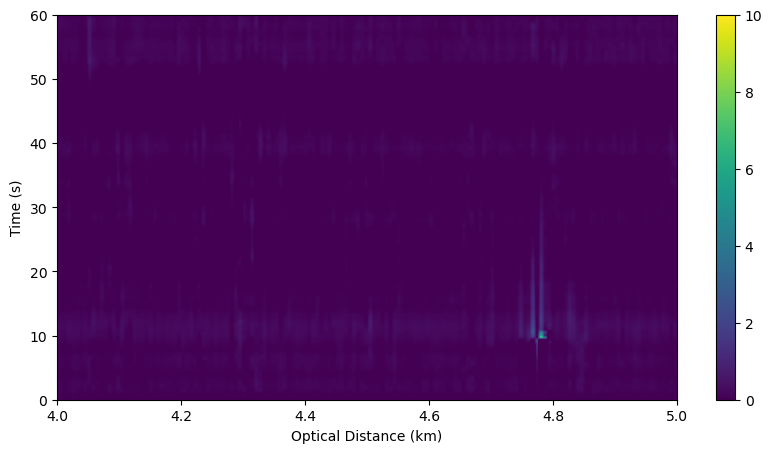

In [10]:
plt.subplots(figsize=(10,5))
vm = 0.01
c=plt.imshow(phi_filt,extent=[0,29.9,0,60],vmin=0,vmax=10,aspect='auto')
plt.colorbar(c)
plt.xlabel('Optical Distance (km)')
plt.ylabel('Time (s)')
plt.xlim([4,5])
plt.show()


In [33]:
#to find the correct channels
#clean and filter data :)

In [9]:
 cable = 'seadasn'

#cable = 'whidbey'
#cambiar la carpeta para encontrar los datos de noviembre.
#definir los channels
record_length = 1 #minutes

t0 = datetime.datetime(2022, 11, 5, 1, 0, 0)
#t0 = datetime.datetime(2022, 11, 7, 1, 0, 0)


prefix, network_name, datastore = data_wrangler(cable,record_length,t0)
data,dates,attrs = open_sintela_file(prefix,
                                      t0,
                                   datastore,
                                 number_of_files=record_length,
                                     verbose=True
                                           )
dx = attrs['SpatialSamplingInterval']
x_max=data.shape[1] * dx


Searching for files matching: /data/data3/seadasn/seadasn_2022-11-05_01-00*h5


In [12]:
dx = attrs['SpatialSamplingInterval']
print(dx)
print(attrs)

6.380952536802641
{'AcquisitionId': b'/', 'Build': b'release-5.18:15_P', 'CommitHash': b'dd06a815', 'DasInstrumentBox': b'ONYX', 'DetectionAccuracy': b'Not Applicable', 'FFID': 0, 'FiberID': 1, 'GaugeLength': 9.571428805203961, 'GaugeLengthUnit': b'm', 'Hostname': b'ONYX-0203', 'MaximumFrequency': 50.0, 'MeasurementStartTime': b'2022-11-05T01:00:00.029687+00:00', 'MinimumFrequency': 0.0, 'NumberOfLoci': 4556, 'OpticalPath': b'OpticalPath', 'PulseRate': 100.0, 'PulseRateUnit': b'Hz', 'PulseWidth': 20.0, 'PulseWidthUnit': b'ns', 'SoftwareVersion': b'2251', 'SpatialSamplingInterval': 6.380952536802641, 'SpatialSamplingIntervalUnit': b'm', 'StartLocusIndex': 0, 'SystemType': b'Xavier', 'TriggeredMeasurement': 0, 'schemaVersion': b'2.0', 'uuid': b'8e33a006-9624-48c0-bfce-7eb3c467fe07'}


In [3]:
date_format = mdates.DateFormatter('%H:%M:%S')
x_lims = mdates.date2num(dates)

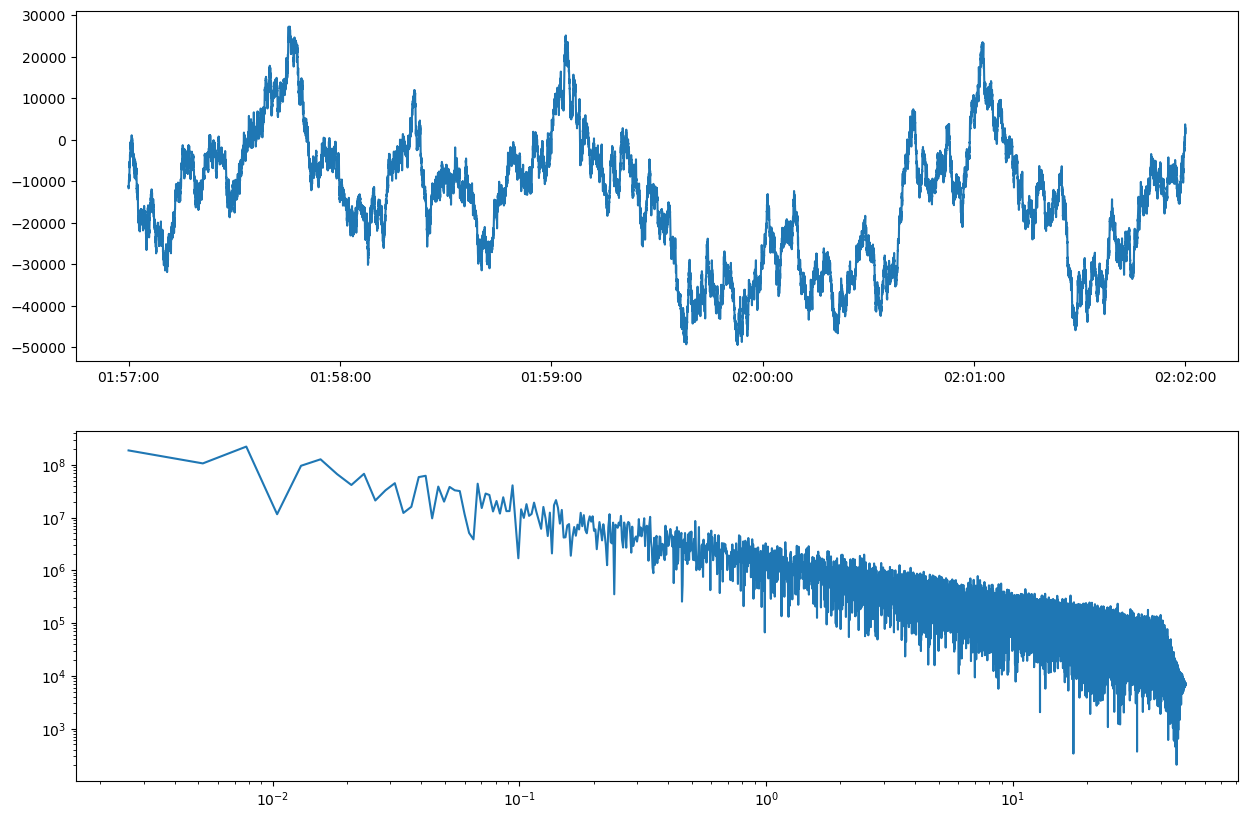

In [4]:
from scipy.signal import detrend
from numpy.fft import fft,fft2,fftfreq,fftshift

fig,ax=plt.subplots(2,1,figsize=(15,10))
ax=plt.subplot(211)
plt.plot(x_lims,np.sum(data,axis=1))
ax.xaxis.set_major_formatter(date_format)
ax.xaxis_date()

plt.subplot(212)
f = fftfreq(data.shape[0],0.01)
ft = np.abs(fft(np.sum(data,axis=1)))
plt.loglog(f[f>0],ft[f>0])

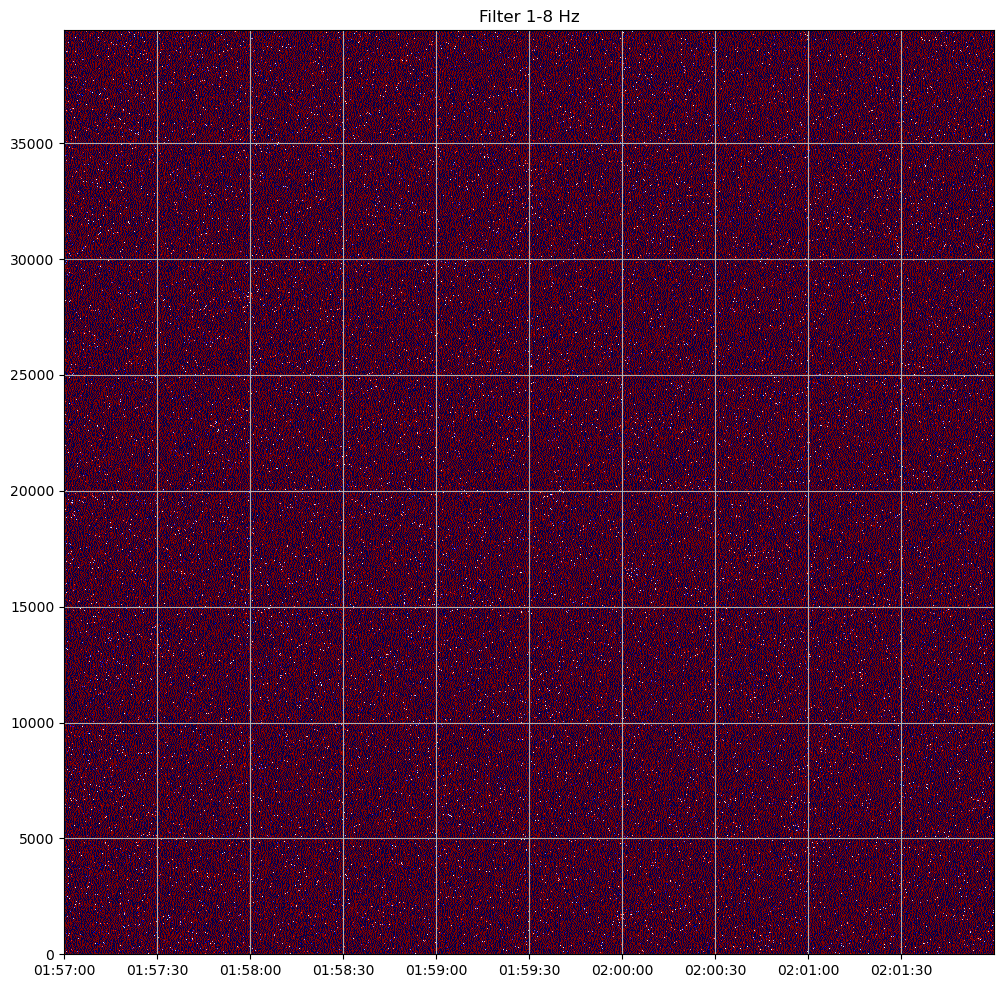

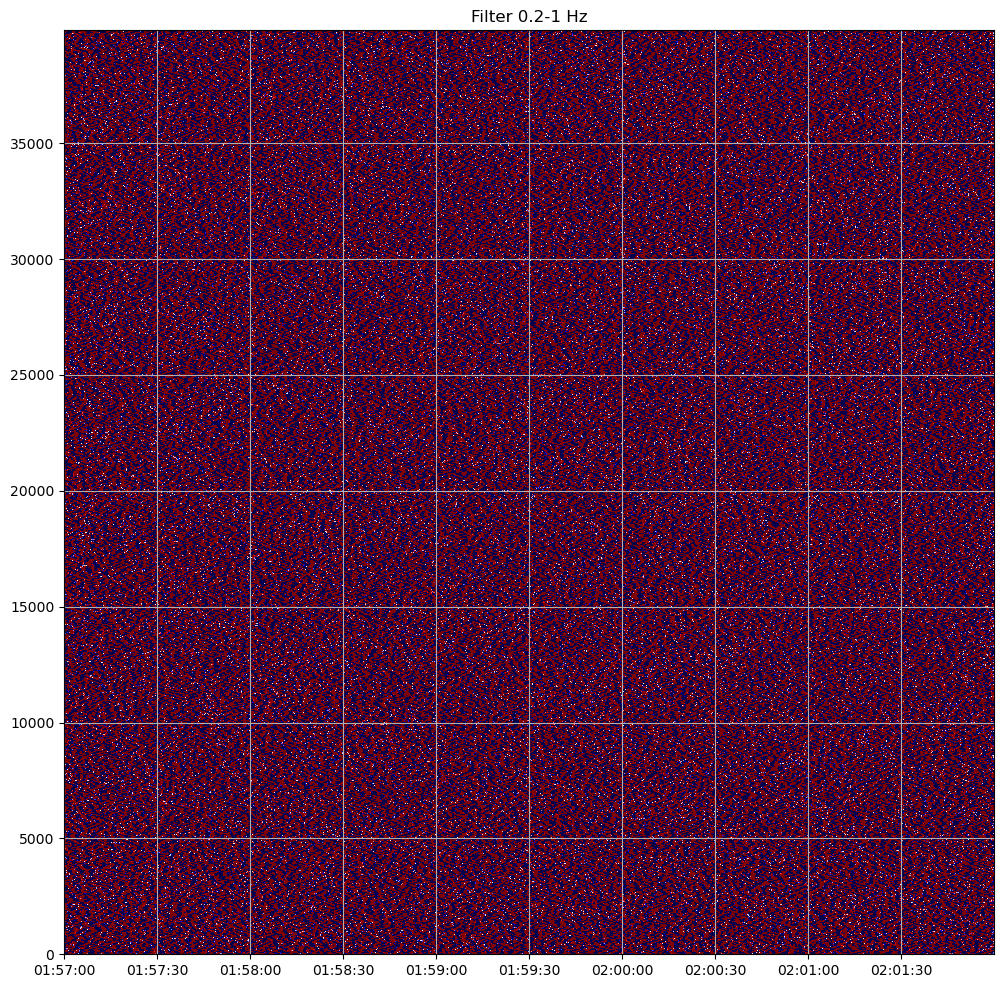

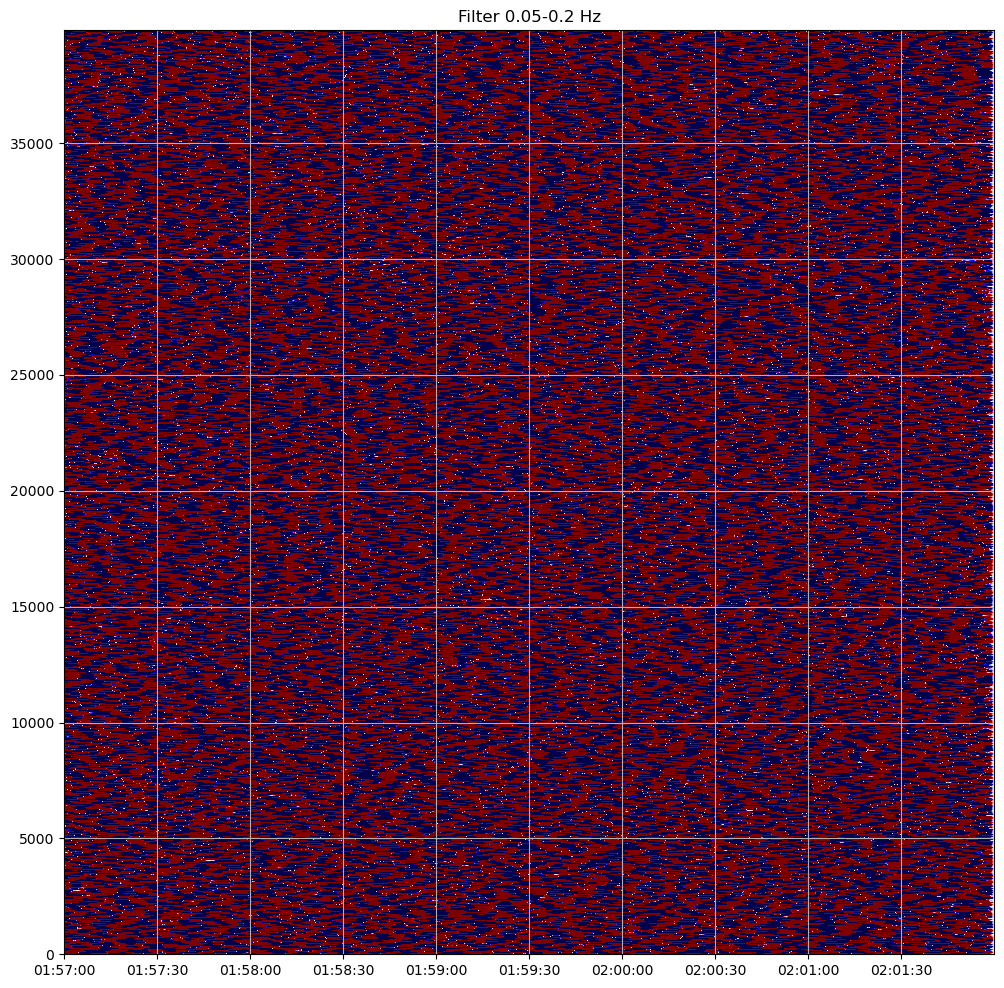

In [5]:
def plot_filtered_data(low_cut,hi_cut,das_vmax=0.1):
    b,a = butter(2,(low_cut,hi_cut),'bp',fs=attrs['MaximumFrequency']*2)
    # data_filt = filtfilt(b,a,data[:,1200:1650],axis=0)
    data_filt = filtfilt(b,a,data,axis=0)

    fig,ax=plt.subplots(figsize=(12,12))


    # Subplot: DAS Data

    plt.imshow(data_filt.T,vmin=-das_vmax,vmax=das_vmax,
               cmap='seismic',aspect='auto', 
               extent=[x_lims[0],x_lims[-1],0,x_max])
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis_date()
    # plt.ylim([0, 4000])
    plt.grid()
    plt.title(f'Filter {low_cut}-{hi_cut} Hz')
    plt.show()
    
plot_filtered_data(1,8)
plot_filtered_data(0.2,1,das_vmax=1)
plot_filtered_data(0.05,0.2,das_vmax=1)

In [ ]:
# Entire subsea region:
# x1 = 1225
# x2 = 1600

# Whidbey half of subsea region:
# x1 = 1225
# x2 = 1412

# Camano half of subsea region:
x1 = 1412
x2 = 1600

xmax = 1720

subsea_data = detrend(data[:,x1:x2])

ft = fftshift(fft2(subsea_data))
f = fftshift(fftfreq(subsea_data.shape[0], d=0.01))
k = fftshift(fftfreq(subsea_data.shape[1], d=attrs['SpatialSamplingInterval']))

In [ ]:
plt.subplots(1,2,figsize=(15,8))
das_vmax=1


low_cut = 0.2
hi_cut = 2

b,a = butter(2,(low_cut,hi_cut),'bp',fs=attrs['MaximumFrequency']*2)
subsea_data_filt = filtfilt(b,a,subsea_data,axis=0)


ax=plt.subplot(121)
ax.imshow(subsea_data_filt.T,vmin=-das_vmax,vmax=das_vmax,
           cmap='seismic',aspect='auto', 
           extent=[x_lims[0],x_lims[-1],(xmax-x2)*dx,(xmax-x1)*dx])
ax.xaxis.set_major_formatter(date_format)
ax.xaxis_date()
ax.set_xlim(x_lims[5000],x_lims[15000])
for i, tick in enumerate(ax.xaxis.get_ticklabels()):
    if i % 2 != 0:
        tick.set_visible(False)
        
ax.set_ylabel('Distance (m)',fontsize=18)
ax.set_xlabel('Time (HH:MM:SS)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


        
ax=plt.subplot(122)
c = ax.imshow(np.log10(np.abs(ft)),
               aspect='auto',cmap='Greys',
               vmin=3,vmax=6,
               extent=[k[0],k[-1],f[0],f[-1]])

# omega = np.sqrt(g*k * np.tanh(k*h))
# plt.plot(k,omega)

# kappa = np.sqrt(1 + np.tan(45 * np.pi/180)**2 ) * k
# omega = np.sqrt(g*kappa * np.tanh(kappa*h))
# plt.plot(k,omega)

# kappa = np.sqrt(k**2 + 0.01**2)
# omega = np.sqrt(g*kappa * np.tanh(kappa*h))
# plt.plot(k,omega)


ax.set_ylabel('Frequency (Hz)',fontsize=18)
ax.set_xlabel('Wavenumber (1/m)',fontsize=18)
ax.set_ylim([-2.5,2.5])
# ax.legend()
# plt.ylim([0])
ax.set_xlim([-0.04,0.04])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.colorbar(c)
plt.grid()
plt.show()